# 특강: 단어 임베딩 모델을 사용한 문학 작품간 유사성 분석

### An Improved Study of Multilevel Semantic Network Visualization for Analyzing Sentiment Word of Movie Review Data
- 논문: https://seongmin-mun.github.io/MyWebsite/Seongmin/Resources/2.Publicated%20Papers/SCIE/Applied%20Sciences/applsci-09-02419-v2.pdf

### 온톨로지 시각화를 활용한 사용자 리뷰 분석 기반 영화 추천 시스템
- 논문: https://seongmin-mun.github.io/MyWebsite/Seongmin/Resources/2.Publicated%20Papers/KCI/Journal%20of%20Society%20of%20Design%20Convergence/Movie%20Recommended%20System%20base%20on%20Analysis%20for%20the%20User%20Review%20utilizing%20Ontology%20Visualization/Movie%20Recommended%20System%20base%20on%20Analysis%20for%20the%20User%20Review%20utilizing%20Ontology%20Visualization.pdf

# 1. 소설데이터 분석하기

In [1]:
# # Mount Google Drive to this Notebook instance.
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

### 소설(gutenberg) 데이터 불러오기
- 프로젝트 구텐베르크: https://www.gutenberg.org/

In [1]:
!pip install nltk

In [3]:
# 사용가능 말뭉치 다운
import nltk
nltk.download("book", quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
# gutenberg 말뭉치 사용하기
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### nltk에 포함된 작품들의 정보
- 1.'austen-emma.txt': 제인 오스틴의 소설 "엠마(Emma)"이다. 사회적 지위를 갖춘 여주인공 엠마 우드하우스가 주변 사람들의 연애를 중개하려다가 자신의 감정을 깨닫게 되는 이야기를 담고 있다.
- 2.'austen-persuasion.txt': 제인 오스틴의 소설 "설득(Persuasion)"이다. 여주인공 앤 엘리엇이 과거에 설득당해 헤어진 옛 연인과 재회하며 벌어지는 이야기를 다루고 있다.
- 3.'austen-sense.txt': 제인 오스틴의 소설 "이성과 감성(Sense and Sensibility)"이다. 대조적인 성격을 가진 두 자매, 엘리너와 마리안 대시우드의 사랑과 생활을 그린 이야기이다.
- 4.'bible-kjv.txt': "킹 제임스 성경(King James Bible)"이다. 영어권에서 가장 많이 사용되는 성경 번역본 중 하나로, 1611년에 출판되었다.
- 5.'blake-poems.txt': 윌리엄 블레이크의 시집 "윌리엄 블레이크의 시(William Blake's Poems)"이다. 블레이크는 시인이자 화가로, 상징적이고 신비로운 시를 많이 남겼다.
- 6.'bryant-stories.txt': 미국의 시인이자 저널리스트로 잘 알려져 있는 윌리엄 컬런 브라이언트의 작품 모음집 "브라이언트의 이야기들(Bryant's Stories)"이다. 
- 7.'burgess-busterbrown.txt': 손튼 버제스의 "버스터 브라운(Buster Brown)"이다. 어린이들을 위한 이야기로, 주인공 버스터 브라운의 모험을 다루고 있다.
- 8.'carroll-alice.txt': 루이스 캐럴의 "이상한 나라의 앨리스(Alice's Adventures in Wonderland)"이다. 앨리스라는 소녀가 토끼굴을 통해 이상한 세계로 들어가 겪는 모험을 그린 이야기이다.
- 9.'chesterton-ball.txt': G.K. 체스터턴의 시집 "The Ballad of the White Horse"이다. 전설적인 앨프레드 대왕의 이야기를 서사시 형식으로 그린 작품이다.
- 10.'chesterton-brown.txt': G.K. 체스터턴의 "브라운 신부의 사건들(The Innocence of Father Brown)"이다. 브라운 신부가 여러 사건을 해결하는 탐정 소설 시리즈이다.
- 11.'chesterton-thursday.txt': G.K. 체스터턴의 "목요일의 남자(The Man Who Was Thursday)"이다. 철학적이고 초현실적인 스파이 소설로, 주인공이 비밀 결사를 추적하는 이야기를 담고 있다.
- 12.'edgeworth-parents.txt': 마리아 에지워스의 "Parents' Assistant"이다. 어린이들을 위한 도덕적이고 교육적인 이야기 모음집이다.
- 13.'melville-moby_dick.txt': 허먼 멜빌의 소설 "모비 딕(Moby-Dick)"이다. 흰 고래 모비 딕을 추적하는 에이허브 선장의 집념과 모험을 그린 대서사시이다.
- 14.'milton-paradise.txt': 존 밀턴의 서사시 "실락원(Paradise Lost)"이다. 사탄의 타락과 인간의 원죄를 다룬 서사시이다.
- 15.'shakespeare-caesar.txt': 윌리엄 셰익스피어의 희곡 "줄리어스 시저(Julius Caesar)"이다. 로마의 정치적 암투와 시저의 암살을 중심으로 한 작품이다.
- 16.'shakespeare-hamlet.txt': 윌리엄 셰익스피어의 희곡 "햄릿(Hamlet)"이다. 덴마크 왕자인 햄릿이 아버지의 죽음과 관련된 음모를 밝혀내는 과정을 그린 작품이다.
- 17.'shakespeare-macbeth.txt': 윌리엄 셰익스피어의 희곡 "맥베스(Macbeth)"이다. 스코틀랜드의 장군 맥베스가 왕위를 차지하기 위해 범죄를 저지르고 파멸에 이르는 과정을 그린 작품이다.
- 18.'whitman-leaves.txt': 월트 휘트먼의 시집 "풀잎(Leaves of Grass)"이다. 미국의 민주주의와 인간의 삶을 찬양하는 시들을 모은 시집이다.

## 허먼 멜빌의 소설 "모비 딕(Moby-Dick)"

In [5]:
#작품 확인하기
mobydick_raw = nltk.corpus.gutenberg.raw("melville-moby_dick.txt")
print(mobydick_raw[:1000])

[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teach them by what
name a whale-fish is to be called in our tongue leaving out, through
ignorance, the letter H, which almost alone maketh the signification
of the word, you deliver that which is not true." --HACKLUYT

"WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness
or rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER'S
DICTIONARY

"WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;
A.S. WALW-IAN, to roll, to wallow." --RICHARDSON'S DICTIONARY



## 데이터 정제하기

In [7]:
import re
# 문장 단위로 분할하기
from nltk.tokenize import sent_tokenize
mobydick_raw_sentences = sent_tokenize(mobydick_raw)

# 기호 제거하기
mobydick_raw_clean = []
for each in mobydick_raw_sentences:
    each = re.sub("[^a-zA-Z\s\n]+","",each)
    each = re.sub("[\s]+"," ",each)
    if each != "":
        mobydick_raw_clean.append(each)


In [8]:
print(mobydick_raw_clean[:5])

['Moby Dick by Herman Melville ETYMOLOGY', 'Supplied by a Late Consumptive Usher to a Grammar School The pale Usherthreadbare in coat heart body and brain I see him now', 'He was ever dusting his old lexicons and grammars with a queer handkerchief mockingly embellished with all the gay flags of all the known nations of the world', 'He loved to dust his old grammars it somehow mildly reminded him of his mortality', 'While you take in hand to school others and to teach them by what name a whalefish is to be called in our tongue leaving out through ignorance the letter H which almost alone maketh the signification of the word you deliver that which is not true']


## 공백을 기준으로 어절(단어) 단위 분석

In [9]:
# 단어의 토큰 + 타입 + 정렬

wordType = set()
wordToken = dict()

for sentence in mobydick_raw_clean:
    if sentence == "":
        pass
    else:
        words = sentence.split(" ")
        for word in words:
            wordType.add(word)
            if wordToken.get(word) == None:
                wordToken[word] = 1
            else:
                wordToken[word] = wordToken[word] + 1

print(wordToken)
print(wordType)

wordDicSortedRT = dict(sorted(wordToken.items(), key=lambda x: x[1], reverse=True))

print(wordDicSortedRT)

{'Moby': 79, 'Dick': 76, 'by': 1132, 'Herman': 1, 'Melville': 1, 'ETYMOLOGY': 1, 'Supplied': 2, 'a': 4477, 'Late': 1, 'Consumptive': 1, 'Usher': 1, 'to': 4496, 'Grammar': 2, 'School': 1, 'The': 599, 'pale': 17, 'Usherthreadbare': 1, 'in': 3889, 'coat': 23, 'heart': 83, 'body': 107, 'and': 5962, 'brain': 32, 'I': 1943, 'see': 242, 'him': 1036, 'now': 627, 'He': 207, 'was': 1626, 'ever': 189, 'dusting': 2, 'his': 2449, 'old': 426, 'lexicons': 1, 'grammars': 2, 'with': 1657, 'queer': 40, 'handkerchief': 5, 'mockingly': 1, 'embellished': 3, 'all': 1412, 'the': 13625, 'gay': 13, 'flags': 1, 'of': 6507, 'known': 80, 'nations': 13, 'world': 149, 'loved': 3, 'dust': 10, 'it': 2090, 'somehow': 43, 'mildly': 10, 'reminded': 4, 'mortality': 1, 'While': 30, 'you': 813, 'take': 116, 'hand': 186, 'school': 8, 'others': 50, 'teach': 5, 'them': 456, 'what': 399, 'name': 67, 'whalefish': 1, 'is': 1681, 'be': 1022, 'called': 112, 'our': 198, 'tongue': 11, 'leaving': 36, 'out': 511, 'through': 223, 'igno

## 복합단어(compound of Multiword Expressions) 처리하기
- 논문: https://seongmin-mun.github.io/MyWebsite/Seongmin/Resources/3.Conferences/Fullpapers/IVAPP2018/Visual%20Profiling%20using%20Multiple-word%20Combinations.pdf


### 복합단어(compound of Multiword Expressions) 사전 불러오기 - 12개 사전

![MWEs](https://seongmin-mun.github.io/AjouUniversityCourse/2024/English%20Language%20and%20Literature/v3/image/MWEs.png)

In [10]:
import re

fileDir = "../data/FMWEDic.txt"

fr = open(fileDir, 'r')
contents = fr.readlines()
fr.close()

    
mobydick_raw_MWEs = []
for sentence in mobydick_raw_clean:
    for eachMWE in contents:
        eachMWE = eachMWE.replace("\n","").lower()
        sentence = sentence.lower().replace(eachMWE,eachMWE.replace(" ","_"))
    mobydick_raw_MWEs.append(sentence)
    
print(mobydick_raw_MWEs[:10])

['moby_dick by herman melville etymology', 'supplied by a late consumptive usher to a grammar school the pale usherthreadbare in coat heart body and brain i see him now', 'he was ever dusting his old lexicons and grammars with a queer handkerchief mockingly embellished with all the gay flags of all the known nations of the world', 'he loved to dust his old grammars it somehow mildly reminded him of his mortality', 'while you take_in hand to school others and to teach them by what name a whalefish is to_be called_in our tongue leaving out through ignorance the letter h which almost alone maketh the signification of the word you deliver that which is not true', 'hackluyt whale', ' sw and dan', 'hval', 'this animal is named from roundness or rolling for in dan', 'hvalt is arched or vaulted']


In [43]:
# 단어의 토큰 + 타입 + 정렬

wordType = set()
wordToken = dict()

for sentence in mobydick_raw_MWEs:
    if sentence == "":
        pass
    else:
        words = sentence.split(" ")
        for word in words:
            wordType.add(word)
            if wordToken.get(word) == None:
                wordToken[word] = 1
            else:
                wordToken[word] = wordToken[word] + 1

print(wordToken)
print(wordType)

wordDicSortedRT = dict(sorted(wordToken.items(), key=lambda x: x[1], reverse=True))

print(wordDicSortedRT)

{'moby_dick': 73, 'by': 1177, 'herman': 1, 'melville': 1, 'etymology': 1, 'supplied': 12, 'a': 4113, 'late': 30, 'consumptive': 1, 'usher': 1, 'to': 3766, 'grammar': 2, 'school': 8, 'the': 14159, 'pale': 18, 'usherthreadbare': 1, 'in': 3595, 'coat': 21, 'heart': 79, 'body': 107, 'and': 6254, 'brain': 32, 'i': 1940, 'see': 258, 'him': 1039, 'now': 765, 'he': 1736, 'was': 1512, 'ever': 186, 'dusting': 2, 'his': 2498, 'old': 336, 'lexicons': 1, 'grammars': 2, 'with': 1641, 'queer': 40, 'handkerchief': 5, 'mockingly': 1, 'embellished': 3, 'all': 1165, 'gay': 14, 'flags': 1, 'of': 6325, 'known': 64, 'nations': 13, 'world': 150, 'loved': 3, 'dust': 10, 'it': 2216, 'somehow': 42, 'mildly': 10, 'reminded': 4, 'mortality': 1, 'while': 244, 'you': 839, 'take_in': 4, 'hand': 174, 'others': 39, 'teach': 5, 'them': 459, 'what': 522, 'name': 67, 'whalefish': 1, 'is': 1616, 'to_be': 285, 'called_in': 2, 'our': 196, 'tongue': 11, 'leaving': 36, 'out': 408, 'through': 218, 'ignorance': 11, 'letter': 12

## nltk의 형태소 분석 기능을 사용하여 형태소 단위로 분석하기

In [45]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

posType = set()
posToken = dict()

for sentence in mobydick_raw_MWEs:
    tagged_list = pos_tag(word_tokenize(sentence))
    posTagout = ["/".join(p) for p in tagged_list]
    for pos in posTagout:
        posType.add(pos)
        if posToken.get(pos) == None:
            posToken[pos] = 1
        else:
            posToken[pos] = posToken[pos] + 1

print(posToken)
print(posType)

posDicSortedRT = dict(sorted(posToken.items(), key=lambda x: x[1], reverse=True))

print(posDicSortedRT)

{'moby_dick/NN': 55, 'by/IN': 1177, 'herman/NN': 1, 'melville/NN': 1, 'etymology/NN': 1, 'supplied/VBN': 10, 'a/DT': 4113, 'late/JJ': 20, 'consumptive/NN': 1, 'usher/NN': 1, 'to/TO': 3766, 'grammar/NN': 2, 'school/NN': 8, 'the/DT': 14159, 'pale/NN': 5, 'usherthreadbare/NN': 1, 'in/IN': 3595, 'coat/JJ': 1, 'heart/NN': 79, 'body/NN': 107, 'and/CC': 6254, 'brain/NN': 32, 'i/NNS': 197, 'see/VBP': 86, 'him/PRP': 1039, 'now/RB': 765, 'he/PRP': 1736, 'was/VBD': 1512, 'ever/RB': 186, 'dusting/VBG': 2, 'his/PRP$': 2498, 'old/JJ': 336, 'lexicons/NNS': 1, 'grammars/NNS': 2, 'with/IN': 1641, 'queer/NN': 26, 'handkerchief/NN': 5, 'mockingly/RB': 1, 'embellished/VBN': 2, 'all/PDT': 312, 'gay/NN': 10, 'flags/NNS': 1, 'of/IN': 6325, 'known/VBN': 56, 'nations/NNS': 13, 'world/NN': 150, 'loved/VBD': 3, 'dust/VB': 1, 'it/PRP': 2216, 'somehow/RB': 19, 'mildly/RB': 10, 'reminded/VBD': 4, 'mortality/NN': 1, 'while/IN': 221, 'you/PRP': 839, 'take_in/VBP': 1, 'hand/NN': 174, 'others/NNS': 39, 'teach/VB': 5, '

## nltk의 어간 추출과 원형 복원 기능을 사용한 단어 분석

In [11]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

print(lm.lemmatize("allowance", pos="n"))
print(lm.lemmatize("are", pos="v"))
print(lm.lemmatize("bluntly", pos="r"))

allowance
be
bluntly


In [12]:
# 어간 추출(stemming)
from nltk.stem import PorterStemmer, LancasterStemmer

pst = PorterStemmer()
lst =  LancasterStemmer()

words = ["allowance", "are", "bluntly", "grammar","ignore"]

print("PorterStemmer   :", [pst.stem(w) for w in words])
print("LancasterStemmer:", [lst.stem(w) for w in words])

PorterStemmer   : ['allow', 'are', 'bluntli', 'grammar', 'ignor']
LancasterStemmer: ['allow', 'ar', 'blunt', 'gramm', 'ign']


In [75]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
import re

contentWordType = set()
contentWordToken = dict()

lm = WordNetLemmatizer()

for sentence in mobydick_raw_MWEs:
    tagged_list = pos_tag(word_tokenize(sentence))
    posTagout = ["/".join(p) for p in tagged_list]
    for pos in posTagout:
        wordEach = pos.split("/")[0]
        posEach = pos.split("/")[1]
        cleandWordEach = ""
        if posEach[0] == "V":
            cleandWordEach = lm.lemmatize(wordEach, pos="v")
            if len(cleandWordEach) <= 2:
                pass
            else:
                contentWordType.add(cleandWordEach)
                if contentWordToken.get(cleandWordEach) == None:
                    contentWordToken[cleandWordEach] = 1
                else:
                    contentWordToken[cleandWordEach] = contentWordToken[cleandWordEach] + 1
        elif posEach[0] == "N" or posEach[0] == "J" or posEach[0] == "R":
            if len(wordEach) <= 2:
                pass
            else:
                contentWordType.add(wordEach)
                if contentWordToken.get(wordEach) == None:
                    contentWordToken[wordEach] = 1
                else:
                    contentWordToken[wordEach] = contentWordToken[wordEach] + 1

print(contentWordToken)
print(contentWordType)

contentWordDicSortedRT = dict(sorted(contentWordToken.items(), key=lambda x: x[1], reverse=True))

print(contentWordDicSortedRT)

{'moby_dick': 73, 'herman': 1, 'melville': 1, 'etymology': 1, 'supply': 24, 'late': 30, 'consumptive': 1, 'usher': 2, 'grammar': 2, 'school': 8, 'pale': 18, 'usherthreadbare': 1, 'coat': 23, 'heart': 79, 'body': 107, 'brain': 33, 'see': 458, 'now': 765, 'ever': 186, 'dust': 12, 'old': 336, 'lexicons': 1, 'grammars': 2, 'queer': 40, 'handkerchief': 5, 'mockingly': 1, 'embellish': 3, 'gay': 14, 'flags': 1, 'know': 255, 'nations': 13, 'world': 150, 'love': 30, 'somehow': 42, 'mildly': 10, 'remind': 10, 'mortality': 1, 'take_in': 4, 'hand': 183, 'others': 39, 'teach': 8, 'name': 78, 'whalefish': 1, 'to_be': 274, 'called_in': 2, 'tongue': 11, 'leave': 115, 'out': 234, 'ignorance': 11, 'letter': 12, 'almost': 193, 'alone': 36, 'maketh': 5, 'signification': 1, 'word': 70, 'deliver': 5, 'not': 1070, 'true': 84, 'hackluyt': 3, 'whale': 957, 'dan': 7, 'hval': 1, 'animal': 17, 'roundness': 1, 'roll': 85, 'hvalt': 2, 'arch': 13, 'vault': 4, 'websters': 3, 'dictionary': 5, 'more': 395, 'immediately

## 데이터 정제하기 - 종합
- 1.문장 단위 분류
- 2.기호 및 외래어, 숫자 제거
- 3.복합단어 적용하기   ### mobydick_raw_MWEs
- 4.원형(v)분석 및 형태소 분석을 통한 문맥어(동사, 명사, 형용사, 부사) 추출
- 5.단어의 길이가 2 이상인 단어만 추출
- 6.불용어 제거하기

In [19]:
#불용어사전 불러오기
fileDir = "../data/stopwordsList.txt"

fr = open(fileDir, 'r')
contents = fr.readlines()
fr.close()

stopwordsList = []
for each in contents:
    stopwordsList.append(each.replace("\n","").lower())
    
print(stopwordsList[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']


In [21]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
import re

contentWordType = set()
contentWordToken = dict()

lm = WordNetLemmatizer()

cleanedSentenceList = []

for sentence in mobydick_raw_MWEs:
    cleanedSentence = ""
    tagged_list = pos_tag(word_tokenize(sentence))
    posTagout = ["/".join(p) for p in tagged_list]
    for pos in posTagout:
        wordEach = pos.split("/")[0]
        posEach = pos.split("/")[1]
        cleandWordEach = ""
        if posEach[0] == "V":
            cleandWordEach = lm.lemmatize(wordEach, pos="v")
            if len(cleandWordEach) <= 2:
                pass
            else:
                if cleandWordEach not in stopwordsList:
                    cleanedSentence = cleanedSentence + " " + cleandWordEach
        elif posEach[0] == "N" or posEach[0] == "J" or posEach[0] == "R":
            if len(wordEach) <= 2:
                pass
            else:
                if wordEach not in stopwordsList:
                    cleanedSentence = cleanedSentence + " " + wordEach
    cleanedSentenceList.append(cleanedSentence.strip())

print(cleanedSentenceList[:10])

['moby_dick herman melville etymology', 'supply late consumptive usher grammar school pale usherthreadbare coat heart body brain see now', 'ever dust old lexicons grammars queer handkerchief mockingly embellish gay flags know nations world', 'love dust old grammars somehow mildly remind mortality', 'take_in hand school others teach name whalefish to_be called_in tongue ignorance letter almost alone maketh signification word deliver true', 'hackluyt whale', 'dan', 'hval', 'animal name roundness roll dan', 'hvalt arch vault']


In [22]:
#정제된 데이터(텍스트) 저장하기
outCome = open("../data/melville-moby_dick_cleaned.txt", 'w', encoding='utf-8')
for each in cleanedSentenceList:
    outCome.write(each+"\n")
outCome.close()

## 코퍼스 분석 - 단어 빈도 계산하기

In [26]:
import pandas as pd
#문장을 문서로 통합
cleanedDocument = ' '.join(cleanedSentenceList)
cleanedDocument = re.sub("[\s]+"," ",cleanedDocument)
cleanedDocument_Split = cleanedDocument.split(" ")
df_words = pd.DataFrame({'word':cleanedDocument_Split})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)

#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))

#내림차순으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)
print(top30)

          word    n
18462    whale  957
11088      now  765
14274      see  458
14283     seem  454
14550     ship  376
9959       man  365
550       ahab  349
18511   whales  348
14149      sea  337
11274      old  336
18968      yet  332
15655    still  306
9705      look  300
9681      long  294
7025     great  294
7467      head  283
16823    to_be  274
16646     thou  259
16606    think  255
9156      know  255
9612    little  248
15504    stand  246
1942      boat  243
16778     time  239
15319    sperm  236
2590   captain  232
18344      way  226
10245      men  223
15820    stubb  223
13740    round  219


## 코퍼스 분석 - 단어 빈도 그래프(Zipf’s law graph) 생성

<AxesSubplot:xlabel='n', ylabel='word'>

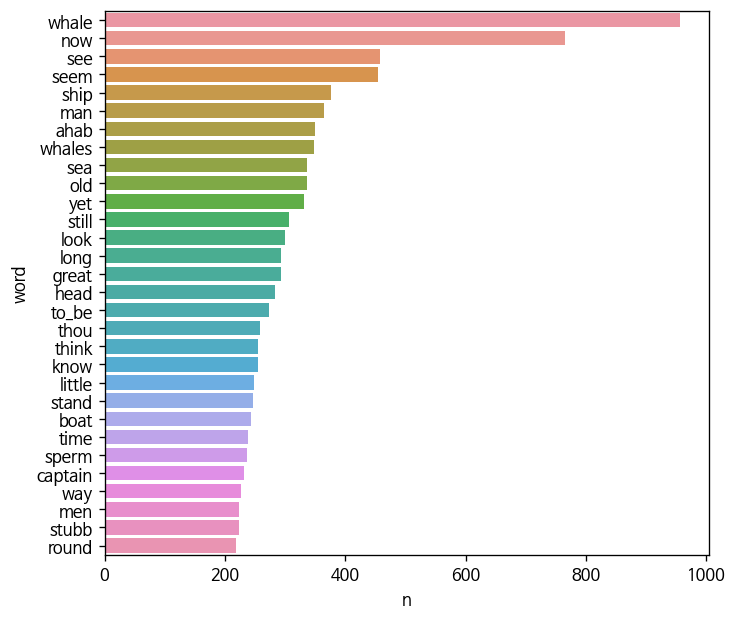

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'NanumBarunGothic'})
# plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

## 코퍼스 분석 - 워들(Wordcloud) 생성

In [28]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

dictNum = 0
for key, value in df_words_dic.items():
    print(key, ":", value)
    dictNum += 1
    if dictNum == 15:
          break

whale : 957
now : 765
see : 458
seem : 454
ship : 376
man : 365
ahab : 349
whales : 348
sea : 337
old : 336
yet : 332
still : 306
look : 300
long : 294
great : 294


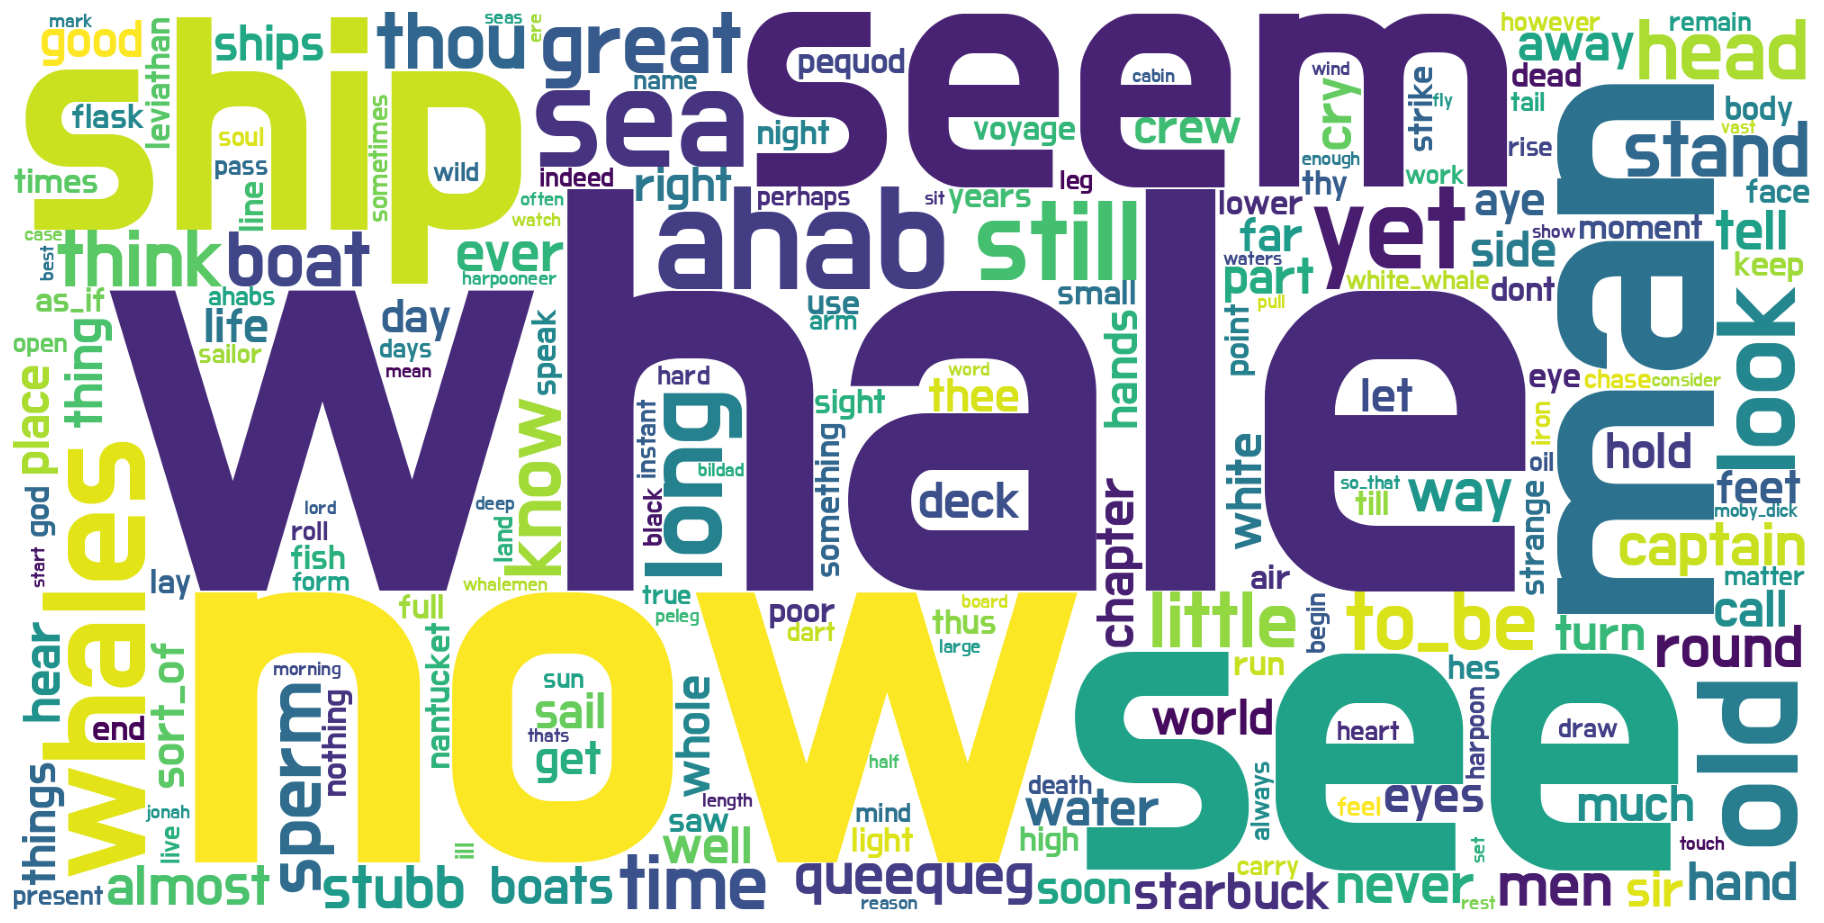

In [29]:
from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = '../data/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 코퍼스 분석 - 워들(Wordcloud) 모양 변경하기

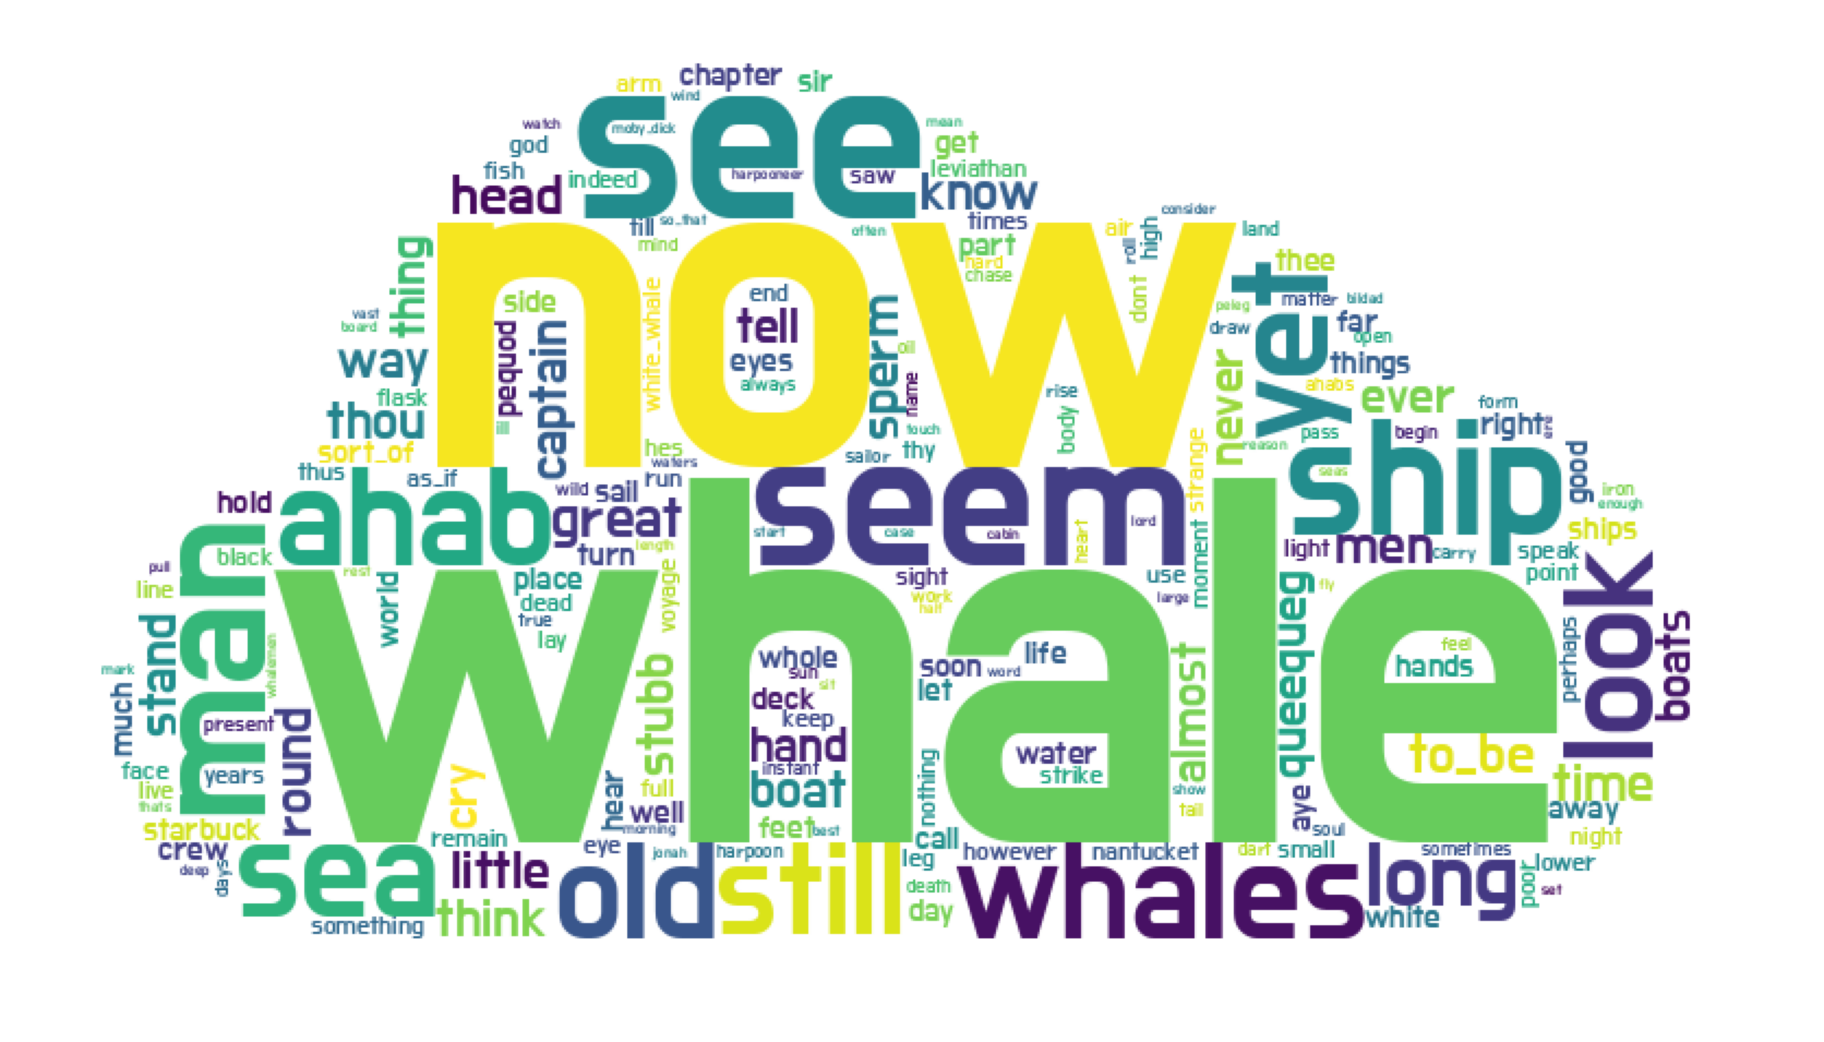

In [30]:
#mask 만들기
import PIL
icon = PIL.Image.open('../data/cloud.png')

import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

#워드 클라우드 생성하기
word_cloud = WordCloud(random_state = 1234,
                       font_path = font,
                       width = 1000, height = 700,
                       background_color='white',
                       mask = img)

img_word_cloud = word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(img_word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 코퍼스 분석 - dispersion_plot(문서 내 단어 사용 위치 분석)

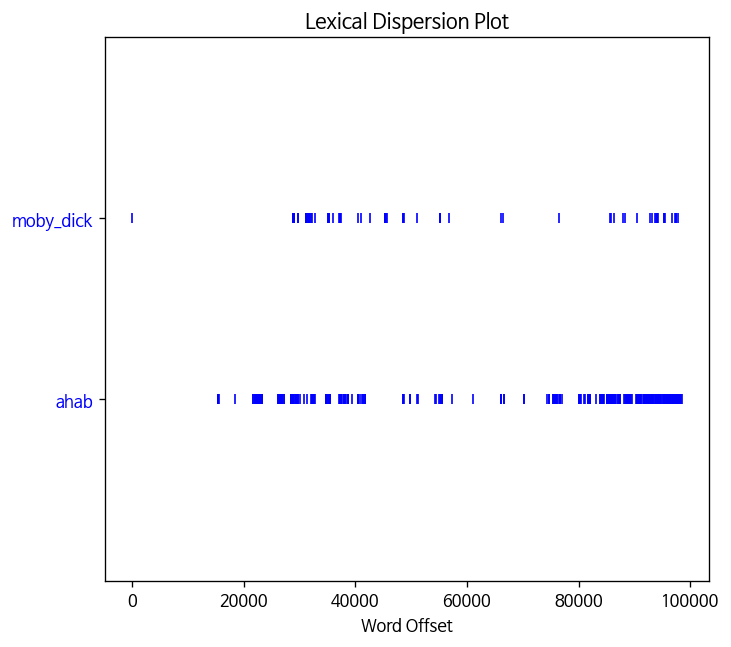

In [52]:
text.dispersion_plot(["moby_dick","ahab"]) #모비딕, 에이허브

## 코퍼스 분석 - concordance(주변 문맥 분석)

In [33]:
from nltk import *
retokenize = RegexpTokenizer("[\w_]+")
text = Text(retokenize.tokenize(cleanedDocument))
print(text[:10])

['moby_dick', 'herman', 'melville', 'etymology', 'supply', 'late', 'consumptive', 'usher', 'grammar', 'school']


In [34]:
text.concordance("moby_dick")

Displaying 25 of 73 matches:
 moby_dick herman melville etymology supply l
ain_ahab tashtego white_whale call moby_dick moby_dick shout ahab know white_wh
ashtego white_whale call moby_dick moby_dick shout ahab know white_whale tash f
 split jib squall death devils men moby_dick seenmoby_dickmoby_dick captain_aha
der captain_ahab hear moby_dickbut moby_dick took_off thy leg tell thee cry aha
se aye starbuck aye hearties round moby_dick dismasted moby_dick bring dead stu
hearties round moby_dick dismasted moby_dick bring dead stump stand now aye sho
 sharp eye white_whale sharp lance moby_dick god bless seem half sob half shout
ck wilt chase white_whale art game moby_dick game crooked jaw jaws death captai
n man deathful whaleboats bowdeath moby_dick god hunt hunt moby_dick death long
s bowdeath moby_dick god hunt hunt moby_dick death long barbed steel goblets li
serve men bowels feel fear chapter moby_dick ishmael crew shouts rest oath weld
al individualizing tidings concern moby_dick 

## 코퍼스 분석 - common_contexts(공통 문맥 분석)

In [53]:
text.common_contexts(["moby_dick", "ahab"])

voyage_now


## 코퍼스 분석 - common_contexts(공통 문맥 분석) - rawApproach

In [55]:
#common_contexts(공통 문맥 분석)
common_contexts_words = set()

for each in cleanedSentenceList:
    eachwords = each.split(" ")
    firstWord = False
    secondWord = False
    for word in eachwords:
        if word == "moby_dick":
            firstWord = True
        if word == "ahab":
            secondWord = True
    if firstWord == True and secondWord == True:
        print(each)
        for word in eachwords:
            common_contexts_words.add(word)
            
print(common_contexts_words)
    

cry ahab pause aye starbuck aye hearties round moby_dick dismasted moby_dick bring dead stump stand now
maddens torments all_that stir lees things truth malice crack sinews cake brain subtle demonisms life think evil crazy ahab visibly personify practically assailable moby_dick
consume hot fire purpose ahab thoughts actions ever view ultimate capture moby_dick seem ready sacrifice mortal interests passion nature long habituation far wed fiery whalemans ways altogether abandon collateral prosecution voyage
not_only subtle insanity ahab respect moby_dick noways significantly manifest superlative sense shrewdness foresee present hunt way strip strange imaginative impiousness naturally invest full terror voyage keep obscure background mens courage proof protract meditation unrelieved action stand long night watches officers men must_have nearer things think moby_dick
almost everybody suppose particular preparative heedfulness ahab view ultimate chase moby_dick already reveal intention hunt

## 전체 텍스트 정제하기

In [56]:
# #작품 확인하기
# import nltk
# nltk.download("book", quiet=True)
# from nltk.book import *
# import re
# from nltk.tokenize import sent_tokenize
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
# from nltk.stem import PorterStemmer, LancasterStemmer
# from nltk.stem import WordNetLemmatizer

# #복합단어 사전 불러오기
# fileDir = "../data/FMWEDic.txt"

# fr = open(fileDir, 'r')
# contents = fr.readlines()
# fr.close()

# MWEList = []
# for eachMWE in contents:
#     MWEList.append(eachMWE.replace("\n","").lower())


# #불용어사전 불러오기
# fileDir = "../data/stopwordsList.txt"

# fr = open(fileDir, 'r')
# contents = fr.readlines()
# fr.close()

# stopwordsList = []
# for each in contents:
#     stopwordsList.append(each.replace("\n","").lower())

# gutenbergList = nltk.corpus.gutenberg.fileids()

# outComeAll = open("../output/Alltext_cleaned.txt", 'w', encoding='utf-8')

# for eachText in gutenbergList:
#     textRaw = nltk.corpus.gutenberg.raw(eachText)
#     textRaw_sentences = sent_tokenize(textRaw)

#     textRaw_clean = []
#     for each in textRaw_sentences:
#         each = re.sub("[^a-zA-Z\s\n]+","",each)
#         each = re.sub("[\s]+"," ",each)
#         if each != "":
#             textRaw_clean.append(each.lower())


#     textRaw_MWEs = []
#     for sentence in textRaw_clean:
#         for eachMWE in MWEList:
#             sentence = sentence.replace(eachMWE,eachMWE.replace(" ","_"))
#         textRaw_MWEs.append(sentence)


#     lm = WordNetLemmatizer()

#     cleanedSentenceList = []

#     for sentence in textRaw_MWEs:
#         cleanedSentence = ""
#         tagged_list = pos_tag(word_tokenize(sentence))
#         posTagout = ["/".join(p) for p in tagged_list]
#         for pos in posTagout:
#             wordEach = pos.split("/")[0]
#             posEach = pos.split("/")[1]
#             cleandWordEach = ""
#             if posEach[0] == "V":
#                 cleandWordEach = lm.lemmatize(wordEach, pos="v")
#                 if len(cleandWordEach) <= 2:
#                     pass
#                 else:
#                     if cleandWordEach not in stopwordsList:
#                         cleanedSentence = cleanedSentence + " " + cleandWordEach
#             elif posEach[0] == "N" or posEach[0] == "J" or posEach[0] == "R":
#                 if len(wordEach) <= 2:
#                     pass
#                 else:
#                     if wordEach not in stopwordsList:
#                         cleanedSentence = cleanedSentence + " " + wordEach
#         cleanedSentenceList.append(cleanedSentence.strip())
#         outComeAll.write(cleanedSentence.strip()+"\n")

#     #정제된 데이터(텍스트) 저장하기
#     outCome = open("../output/"+eachText.replace(".txt","_cleaned.txt"), 'w', encoding='utf-8')
#     for each in cleanedSentenceList:
#         outCome.write(each+"\n")
#     outCome.close()

# outComeAll.close()


# 2. 문서 벡터화 및 네트워크 생성

## term-document matrix (words-reviews matrix)
- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (0:10): https://www.youtube.com/watch?v=xtD47WHNhxk&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=3

![TDM](https://seongmin-mun.github.io/AjouUniversityCourse/2024/English%20Language%20and%20Literature/v3/image/TDM.png)

![TFIDF](https://seongmin-mun.github.io/AjouUniversityCourse/2024/English%20Language%20and%20Literature/v3/image/TFIDF.png)

- tf(d,t) : 각 문서에서의 각 단어의 등장 빈도를 나타내는 값; log(tf(d,t)+1)
- df(t) : 특정 단어 t가 등장한 문서의 수;
- idf(d, t) : df(t)에 반비례하는 수; log(n/1+df(t))

In [111]:
import pandas as pd
from math import log

docs = [
    "The cat sat on the mat",
    "The dog sat on the log",
    "The cat and the dog sat on the mat"
]
vocab = list(set(w for doc in docs for w in doc.split()))
print(vocab)

['on', 'log', 'mat', 'the', 'dog', 'cat', 'sat', 'and', 'The']


### tf-idf관련 함수 생성

In [153]:

def tf(d, t):
    return d.count(t)

def idf(d, t):
    n = len(d)
    df = 0
    for doc in d:
        if t in doc:
            df += 1
    return log(n/(df))

def tfidf(doc, d, t):
    return tf(d, t) * idf(doc, t)

### tf값 생성

In [154]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(0, len(vocab)): 
    result.append([])
    t = vocab[i]
    for j in range(0, len(docs)):
        d = docs[j]
        result[-1].append(tf(d, t))
    print(result)

tf_ = pd.DataFrame(result, index = vocab)
print(tf_)

[[1, 1, 1]]
[[1, 1, 1], [0, 1, 0]]
[[1, 1, 1], [0, 1, 0], [1, 0, 1]]
[[1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 2]]
[[1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 2], [0, 1, 1]]
[[1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 2], [0, 1, 1], [1, 0, 1]]
[[1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 2], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
[[1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 2], [0, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1]]
[[1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 2], [0, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]
     0  1  2
on   1  1  1
log  0  1  0
mat  1  0  1
the  1  1  2
dog  0  1  1
cat  1  0  1
sat  1  1  1
and  0  0  1
The  1  1  1


### idf값 생성

In [155]:
result = []
for i in range(0, len(vocab)):
    t = vocab[i]
    result.append(idf(docs, t))

print(result)
idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
print(idf_)

[0.0, 1.0986122886681098, 0.4054651081081644, 0.0, 0.4054651081081644, 0.4054651081081644, 0.0, 1.0986122886681098, 0.0]
          IDF
on   0.000000
log  1.098612
mat  0.405465
the  0.000000
dog  0.405465
cat  0.405465
sat  0.000000
and  1.098612
The  0.000000


### tf-idf값 생성

In [156]:
result = []
# 각 문서에 대해서 아래 연산을 반복
for i in range(0, len(vocab)):
    result.append([])
    t = vocab[i]
    for j in range(0,len(docs)):
        d = docs[j]
        result[-1].append(tfidf(docs, d, t))
print(result)


tfidf_ = pd.DataFrame(result, index = vocab)
print(tfidf_)

[[0.0, 0.0, 0.0], [0.0, 1.0986122886681098, 0.0], [0.4054651081081644, 0.0, 0.4054651081081644], [0.0, 0.0, 0.0], [0.0, 0.4054651081081644, 0.4054651081081644], [0.4054651081081644, 0.0, 0.4054651081081644], [0.0, 0.0, 0.0], [0.0, 0.0, 1.0986122886681098], [0.0, 0.0, 0.0]]
            0         1         2
on   0.000000  0.000000  0.000000
log  0.000000  1.098612  0.000000
mat  0.405465  0.000000  0.405465
the  0.000000  0.000000  0.000000
dog  0.000000  0.405465  0.405465
cat  0.405465  0.000000  0.405465
sat  0.000000  0.000000  0.000000
and  0.000000  0.000000  1.098612
The  0.000000  0.000000  0.000000


## 전체 텍스트에서 등장한 상위 200개의 단어 추출

In [157]:
#불용어사전 불러오기
fileDir = "../output/Alltext_cleaned.txt"

fr = open(fileDir, 'r')
contents = fr.readlines()
fr.close()

cleanedSentenceList = []
for each in contents:
    cleanedSentenceList.append(each.replace("\n",""))
    
import pandas as pd
#문장을 문서로 통합
cleanedDocument = ' '.join(cleanedSentenceList)
cleanedDocument = re.sub("[\s]+"," ",cleanedDocument)
cleanedDocument_Split = cleanedDocument.split(" ")
df_words = pd.DataFrame({'word':cleanedDocument_Split})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)

#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))

#내림차순으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top200 = df_words.head(200)
print(top200)

           word     n
28333      lord  8439
47783      thou  6639
48008       thy  5582
47321      thee  4702
29081       man  4684
...         ...   ...
12360   deliver   621
32966     offer   621
34859     peace   620
14739     egypt   618
54004  would_be   618

[200 rows x 2 columns]


In [158]:
terms = list(top200["word"])
print(terms)

['lord', 'thou', 'thy', 'thee', 'man', 'now', 'god', 'see', 'know', 'unto', 'little', 'to_be', 'think', 'king', 'house', 'people', 'day', 'great', 'son', 'hear', 'israel', 'men', 'hath', 'look', 'let', 'hand', 'children', 'good', 'yet', 'time', 'land', 'father', 'tell', 'things', 'bring', 'thing', 'mrs', 'speak', 'away', 'never', 'old', 'well', 'call', 'seem', 'shalt', 'stand', 'place', 'earth', 'saw', 'much', 'long', 'ever', 'name', 'pass', 'face', 'way', 'therefore', 'behold', 'heart', 'head', 'eyes', 'cry', 'turn', 'life', 'still', 'thus', 'nothing', 'love', 'days', 'word', 'put', 'send', 'answer', 'voice', 'miss', 'hast', 'world', 'sons', 'saith', 'begin', 'get', 'keep', 'ask', 'sea', 'right', 'soon', 'round', 'heaven', 'quite', 'words', 'thine', 'david', 'work', 'came_to', 'eat', 'years', 'sir', 'mine', 'always', 'set', 'that_is', 'sit', 'whale', 'night', 'city', 'mother', 'want', 'high', 'forth', 'part', 'hands', 'open', 'whole', 'death', 'walk', 'return', 'and_all', 'rise', 'som

In [160]:
#작품 확인하기
import nltk
nltk.download("book", quiet=True)
from nltk.book import *
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer

gutenbergList = nltk.corpus.gutenberg.fileids()

documents = []

for eachText in gutenbergList:
    
    #각 소설 데이터 불러오기
    fileDir = "../output/"+eachText.replace(".txt","_cleaned.txt")

    fr = open(fileDir, 'r')
    contents = fr.readlines()
    fr.close()

    cleanedSentenceList = []
    for each in contents:
        cleanedSentenceList.append(each.replace("\n",""))

    import pandas as pd
    #문장을 문서로 통합
    cleanedDocument = ' '.join(cleanedSentenceList)
    cleanedDocument = re.sub("[\s]+"," ",cleanedDocument)
    documents.append(cleanedDocument)
    
print(documents[:1])

['emma jane austen volume chapter emma handsome clever rich a_comfortable home happy disposition seem unite best blessings existence live nearly years world little distress vex youngest daughters affectionate indulgent father consequence sisters marriage mistress house early period mother die long_ago_for more_than indistinct remembrance caresses place supply excellent woman governess fall little short mother affection sixteen years miss taylor woodhouses family governess friend fond daughters particularly emma intimacy sisters miss taylor cease hold nominal office governess mildness temper hardly allow impose restraint shadow authority now long pass away live together friend friend mutually attach emma like highly esteem miss taylors judgment direct chiefly real evils indeed emmas situation power rather too_much way disposition think little well disadvantages threaten alloy enjoyments danger however at_present unperceived means rank misfortunes sorrow camea gentle sorrowbut shape disa

## tf-idf적용해서 문서 단어 행렬(벡터화) 생성하기

In [162]:
result = []
# 각 문서에 대해서 아래 연산을 반복
for i in range(0, len(terms)):
    result.append([])
    t = terms[i]
    for j in range(0, len(documents)):
        d = documents[j]
        result[-1].append(tfidf(documents, d, t))
print(result)


tfidf_mat = pd.DataFrame(result, index = terms)
print(tfidf_mat)

[[1.4585724543516367, 2.0055371247335003, 5.469646703818638, 1459.3017405788125, 0.0, 2.3701802383214097, 0.0, 0.0, 2.552501795115364, 7.839826942140047, 1.276250897557682, 37.193597585966735, 19.508406576953142, 6.74589760137632, 8.204470055727956, 40.657707165051875, 8.569113169315866, 4.922682033436774], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.240189283629804, 1.766745534845752, 1.531179463532985, 564.4163068653895, 3.7690571410042706, 1.531179463532985, 0.0, 0.0, 2.9445758914095865, 2.0023116061585187, 2.3556607131276692, 1.531179463532985, 17.785238384113903, 52.06010176012149, 7.655897317664925, 10.836039280387277, 8.83372767422876, 32.625900876818214], [0.0, 0.0, 0.0, 1852.696536937902, 19.206582918813975, 4.432288365880148, 0.0, 0.0, 1.4774294552933827, 0.0, 0.0, 0.9849529701955885, 62.052037122322076, 173.35172275442358, 29.05611262076986, 30.53354207606324, 32.010971531356624, 126.07398018503532], [0.0, 0.0, 0.0, 0.0, 0.0

## 코사인 유사도(Cosine Similarity)
- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (2:30): https://www.youtube.com/watch?v=-_i9Cg81rXA&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=4

![cosine](https://seongmin-mun.github.io/AjouUniversityCourse/2024/English%20Language%20and%20Literature/v3/image/cosine.png)

In [163]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


## 네트워크 생성하기
- 점(Node; 노드)과 선(Edge; 엣지)을 사용하여 데이터들 사이의 관계를 직관적으로 표현한 시각화 방법이다.

![network](https://seongmin-mun.github.io/AjouUniversityCourse/2024/English%20Language%20and%20Literature/v3/image/network.png)

In [169]:
#작품 확인하기
import nltk
nltk.download("book", quiet=True)
from nltk.book import *
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer

gutenbergList = nltk.corpus.gutenberg.fileids()

sourceList = []
targetList = []
scoreList = []
for i in range(0,len(gutenbergList)):
    for j in range(0,len(gutenbergList)):
        source = np.array(list(tfidf_mat.loc[:,i]))
        target = np.array(list(tfidf_mat.loc[:,j]))
        score = cos_sim(source, target)
        if 0.5 <= score:
            if gutenbergList[i] != gutenbergList[j]:
                sourceList.append(gutenbergList[i])
                targetList.append(gutenbergList[j])
                scoreList.append(score)
            
gutenbergListNetwork = pd.DataFrame({'source':sourceList, 'target':targetList, 'score':scoreList})
gutenbergListNetwork.to_csv("../network/gutenbergListNetwork.csv")  
print(gutenbergListNetwork)

                   source                   target     score
0         austen-emma.txt         austen-sense.txt  0.547751
1         austen-emma.txt    edgeworth-parents.txt  0.501953
2   austen-persuasion.txt         austen-sense.txt  0.859056
3   austen-persuasion.txt    edgeworth-parents.txt  0.844013
4        austen-sense.txt          austen-emma.txt  0.547751
..                    ...                      ...       ...
63     whitman-leaves.txt      chesterton-ball.txt  0.505622
64     whitman-leaves.txt  chesterton-thursday.txt  0.509145
65     whitman-leaves.txt      milton-paradise.txt  0.650361
66     whitman-leaves.txt   shakespeare-caesar.txt  0.592524
67     whitman-leaves.txt  shakespeare-macbeth.txt  0.522589

[68 rows x 3 columns]


In [170]:
#각 열의 데이터를 숫자 나열로 변환 ex) 2839 2309 0 2088 1319 1741 3460 1029 3332
nodes = list(set([*gutenbergListNetwork.source, *gutenbergListNetwork.target]))
#텍스트파일에 존재하는 관계 데이터를 중첩 리스트 형태로 변환 ex) [[2839, 3064], [2309, 2590]]
edges = gutenbergListNetwork.values.tolist()

print(nodes)
print(edges)

['edgeworth-parents.txt', 'burgess-busterbrown.txt', 'chesterton-ball.txt', 'shakespeare-hamlet.txt', 'chesterton-thursday.txt', 'milton-paradise.txt', 'carroll-alice.txt', 'austen-emma.txt', 'shakespeare-caesar.txt', 'whitman-leaves.txt', 'austen-sense.txt', 'shakespeare-macbeth.txt', 'chesterton-brown.txt', 'austen-persuasion.txt', 'blake-poems.txt']
[['austen-emma.txt', 'austen-sense.txt', 0.5477511465685875], ['austen-emma.txt', 'edgeworth-parents.txt', 0.5019534973585403], ['austen-persuasion.txt', 'austen-sense.txt', 0.8590558511892638], ['austen-persuasion.txt', 'edgeworth-parents.txt', 0.8440127878228428], ['austen-sense.txt', 'austen-emma.txt', 0.5477511465685875], ['austen-sense.txt', 'austen-persuasion.txt', 0.8590558511892638], ['austen-sense.txt', 'edgeworth-parents.txt', 0.915270208271395], ['blake-poems.txt', 'milton-paradise.txt', 0.7725505526951341], ['blake-poems.txt', 'shakespeare-caesar.txt', 0.7292784747073653], ['blake-poems.txt', 'shakespeare-macbeth.txt', 0.6431

In [171]:
#선택과 필터 적용하기
from pyvis.network import Network

net = Network(notebook=True, cdn_resources="remote", bgcolor="#151417", font_color="#F0EDF6", width="100%", select_menu=True, filter_menu=True)

net.add_nodes(nodes)
net.add_edges(edges)
net.show("../network/gutenbergListNetwork.html") #체스터턴, 세익스피어, 오스틴

../network/gutenbergListNetwork.html
